# Real-world Data Wrangling - (Movies & TV Shows of Netflix & Amazon Prime)

## 1. Gather data

"In this part, you need to collect data using two different methods and then merge the data together. Make sure to use at least two distinct methods for gathering data.

### **1.1.** Problem Statement
In a few sentences, describe the issue you're investigating and the datasets you'll be organizing and using for this project.

*In this project, I will evaluate, clean up, merge, and save two datasets about Movies and TV Shows from Netflix and Amazon Prime. I will use this data to explore and answer some interesting questions.


### 1.2. Gather at Least Two Datasets Using Different Methods

Methods for Gathering Data:

* Manually download data.
* Automate file downloads programmatically.
* Use APIs to collect data.
* Scrape data from HTML pages using BeautifulSoup.
* Pull data from a SQL database.


Requirements for Each Dataset:

* Each dataset must include at least two variables.
* Each dataset must contain more than 500 data samples.

Description and Documentation:
For each dataset, provide a detailed explanation (2-3 sentences) of why you chose the specific dataset and method. Mention the key variables in the dataset and their importance. Also, include any relevant code snippets (e.g., API usage to retrieve data).

Loading the Data:
Demonstrate how to load the data into this notebook programmatically.

#### **Dataset 1**
The dataset is about Netflix movies and tv shows.

Type: (CSV file)

Method: (The data was gatherd using API from kaggle website)

Gathering Method:

I selected the Kaggle API to collect the dataset because it allows for automated and secure downloads, provides access to a large community of data scientists, and facilitates easier and more reliable data management.
Variables in the Dataset:

* show_id: Unique identifier for each movie or TV show.
* type: Differentiates between movies and TV shows.
* title: Name of the movie or TV show.
* director: Director of the movie or TV show.
* cast: Actors and actresses featured in the movie or TV show.
* country: Country where the movie or TV show was produced.
* date_added: Date when the movie or TV show was added to Netflix.
* release_year: Year the movie or TV show was released.
* rating: Rating assigned to the movie or TV show.
* duration: Length of the movie or TV show.
* listed_in: Genre or category of the movie or TV show.
* description: Brief summary of the movie or TV show.

Source: https://www.kaggle.com/datasets/shivamb/netflix-shows/data

In [69]:
# # Create a directory for Kaggle API credentials if it doesn't exist
# !mkdir -p ~/.kaggle
# # Copy the Kaggle API key to the correct location
# !cp /content/datasets/kaggle.json ~/.kaggle/kaggle.json
# # Secure the API key file by setting appropriate permissions
# !chmod 600 ~/.kaggle/kaggle.json

# Import necessary libraries for data manipulation and visualization
import pandas as pd  # for handling data in tabular form
import numpy as np   # for numerical operations
import kaggle        # for downloading datasets from Kaggle
import os            # for interacting with the file system
import matplotlib.pyplot as plt  # for plotting graphs


In [70]:
# Create a directory named 'datasets' if it doesn't already exist
folder = "datasets"
if not os.path.exists(folder):
    os.makedirs(folder)

# Get the current working directory
directory = os.getcwd()

# Combine the directory path and the 'datasets' folder into one full path
file_location = os.path.join(directory, folder)


In [71]:
# Sign in to the Kaggle account using API
kaggle.api.authenticate()

# Set the folder path where the dataset will be saved
file_location = "datasets"

# Get the dataset from Kaggle and unzip it in the specified folder
kaggle.api.dataset_download_files("shivamb/netflix-shows", path=file_location, unzip=True)

# Load the dataset from a CSV file into a table using pandas
netflix_data = pd.read_csv("datasets/netflix_titles.csv")


Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows


#### Dataset 2
The dataset is about the movies / tv shows of Amazon Prime

Type: (CSV File)

Method: Download it manually from kaggle website

Reason of choose the  method: Simple and clear

Variables in the Dataset:

* show_id: Unique identifier for each movie or TV show.
* type: Specifies whether it is a movie or a TV show.
* title: Name of the movie or TV show.
* director: Who directed the movie or TV show.
* cast: Actors involved in the movie or TV show.
* country: Country where the movie or TV show was produced.
* date_added: When the movie or TV show was added to Amazon Prime.
* release_year: Year the movie or TV show was released.
* rating: Rating given to the movie or TV show.
* duration: Length of the movie or TV show in minutes.
* listed_in: Genre or category of the movie or TV show.
* description: A brief summary of the movie or TV show.

Source: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows

In [72]:
# Load the Amazon Prime movies/TV shows data from a CSV file into a DataFrame
amazonPrime_data = pd.read_csv('datasets/amazon_prime_titles.csv')


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Missing Values in both datasets

In [73]:
# Display the first 5 rows of the Netflix dataset to visually inspect the data
netflix_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [74]:
# Show the first 5 rows of the Amazon Prime dataset for a visual inspection
amazonPrime_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [75]:
# Get detailed information about the Netflix dataset, including data types and non-null counts
netflix_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [76]:
# Retrieve detailed info about the Amazon Prime dataset, such as data types and missing values
amazonPrime_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


Issue and justification: The first quality issue is both datasets contains missing values**

**The Netflix dataset's columns:** *director, cast, country, date_added, rating and duration* have missing values as shown above.

**The Amazon Prime dataset's columns:** *director, cast, country, date_added and rating* have missing values as shown above.

I will leave director's missing values as it is because the high count of missing values and the importance of the column.

The columns "cast" and "country" in both datasets will be dropped because of thier useless.

The column "date_added" will be even dropped after correcting it's data type in both datasets.

The column "rating" is going to be dropped it's mssing values in both datasets.

The column "duration" in Netflix dataset have some missing values and it is going to be dropped.

### Quality Issue 2: Wrong data type in 'type'

In [77]:
# Display the first 5 entries of the 'type' column from the Netflix dataset for a quick visual check
netflix_data['type'].head()


0      Movie
1    TV Show
2    TV Show
3    TV Show
4    TV Show
Name: type, dtype: object

In [78]:
# Show the first 20 entries in the 'type' column of the Amazon Prime dataset for visual inspection
amazonPrime_data['type'].head(20)


0       Movie
1       Movie
2       Movie
3       Movie
4       Movie
5       Movie
6       Movie
7       Movie
8       Movie
9       Movie
10      Movie
11      Movie
12      Movie
13      Movie
14      Movie
15      Movie
16      Movie
17    TV Show
18    TV Show
19      Movie
Name: type, dtype: object

In [79]:
# Check the distribution of values in the 'type' column of the Netflix dataset.
# This helps confirm there are only two types: 'movie' and 'tv show'.
# The column's data type should be converted from object to category for optimization.
netflix_data['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [80]:
# Display the unique categories within the 'type' column of the Netflix dataset
netflix_data['type'].unique()


array(['Movie', 'TV Show'], dtype=object)

In [81]:
# Count the occurrences of each unique category in the 'type' column of the Amazon Prime dataset
amazonPrime_data['type'].value_counts()


type
Movie      7814
TV Show    1854
Name: count, dtype: int64

In [82]:
# List unique values in the 'type' column of the Amazon Prime dataset to verify data consistency
amazonPrime_data['type'].unique()


array(['Movie', 'TV Show'], dtype=object)

**Quality Issue and Justification:**

* **Issue:** The 'type' column in both datasets is not using the optimal data type.
Explanation: This column only contains two
* **values:** 'Movie' and 'TV Show'. Converting it to a 'category' data type will make the dataset more efficient for processing and analysis, as 'category' types use less memory and are better for columns with a small number of unique values.

### Quality Issue 3: Wrong data type in 'date_added'

In [83]:
# Display the first 5 entries of the 'date_added' column from the Netflix dataset to check the data format
# This helps verify that the data, while stored as strings (object type), should be in a date format
netflix_data['date_added'].head()


0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [84]:
# Show the first 5 entries in the 'date_added' column of the Amazon Prime dataset to examine the format
# This check is necessary to confirm that the data format, currently stored as strings, needs to be in date format
amazonPrime_data['date_added'].head()


0    March 30, 2021
1    March 30, 2021
2    March 30, 2021
3    March 30, 2021
4    March 30, 2021
Name: date_added, dtype: object

In [85]:
# Retrieve information about the 'date_added' column in the Netflix dataset to confirm its data type
netflix_data['date_added'].dtype


dtype('O')

In [86]:
# Get the data type of the 'date_added' column in the Amazon Prime dataset to verify its format
amazonPrime_data['date_added'].dtype


dtype('O')

**Issue and Justification:**

**Issue:** The 'date_added' column in both datasets has an incorrect data type.

**Explanation:** This column contains date information but is currently stored as an 'object' (string), which should be converted to 'datetime'. Using the 'datetime' data type is essential for efficient date manipulation and analysis.

### Tidiness Issue 1: Multiple variables stored in 'duration'

In [87]:
# Display the first 5 entries of the 'duration' column from the Netflix dataset to visually inspect the format
netflix_data['duration'].head()


0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object

In [88]:
# Show the first 20 entries in the 'duration' column of the Amazon Prime dataset for a visual check
amazonPrime_data['duration'].head(20)


0      113 min
1      110 min
2       74 min
3       69 min
4       45 min
5       52 min
6       98 min
7      131 min
8       87 min
9       92 min
10      88 min
11      93 min
12      94 min
13      46 min
14      74 min
15      96 min
16      87 min
17    1 Season
18    1 Season
19     104 min
Name: duration, dtype: object

In [89]:
# Analyze the distribution of values in the 'duration' column of the Netflix dataset
# This will help determine if the values are mixed improperly and should be separated into different columns
netflix_data['duration'].value_counts()


duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [90]:
# Count and display how often each unique value appears in the 'duration' column of the Amazon Prime dataset
# This assessment helps identify if the column combines multiple data types that should be separated
amazonPrime_data['duration'].value_counts()


duration
1 Season      1342
2 Seasons      229
90 min         223
91 min         220
92 min         203
              ... 
21 Seasons       1
485 min          1
550 min          1
181 min          1
191 min          1
Name: count, Length: 219, dtype: int64

**Issue and Justification:**

**Issue:** The 'duration' column in both datasets includes two types of data: minutes for movies and seasons for TV shows.

**Explanation:** This mixture of data types in a single column can lead to confusion and inaccuracies in data analysis. It would be more effective to separate these into two distinct columns: 'movie_duration' for the length of movies in minutes, and 'show_seasons' for the number of seasons in TV shows. This separation enhances clarity and facilitates more specific analyses.

## 3. Clean data
Clean the data to fix the 4 issues related to data quality and organization found earlier. Explain why you make each cleaning decision.

After cleaning each issue, check if the cleaning was successful using either a visual or programmatic method.

At this stage, also remove any unnecessary variables and combine your datasets. You can combine and remove variables before or after cleaning. Make sure your final dataset has at least 4 variables.

In [91]:
# Create copies of the datasets to ensure the original data remains unchanged
cleaned_netflix_data = netflix_data.copy()
cleaned_amazonPrime_data = amazonPrime_data.copy()


### **Quality Issue 1: Missing Values in both datasets**

In [92]:
# Remove the 'cast' and 'country' columns from the cleaned Netflix dataset
cleaned_netflix_data.drop(['cast', 'country'], axis=1, inplace=True)

# Remove rows with missing values in the 'rating' column
cleaned_netflix_data = cleaned_netflix_data.dropna(subset=['rating'])

# Remove rows with missing values in the 'duration' column
cleaned_netflix_data = cleaned_netflix_data.dropna(subset=['duration'])


In [93]:
# Validate that the 'cast' and 'country' columns were successfully dropped by displaying the first few rows
cleaned_netflix_data.head()


,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [94]:
# Validate that there are no missing values in the 'rating' column
print('rating missing values:')
sum(cleaned_netflix_data['rating'].isnull())


rating missing values:


0

In [95]:
# Validate that there are no missing values in the 'duration' column
print('duration missing values:')
sum(cleaned_netflix_data['duration'].isnull())


duration missing values:


0

In [96]:
# check the shape after this step
cleaned_netflix_data.shape

(8800, 10)

In [97]:
# Remove the 'cast' and 'country' columns from the cleaned Amazon Prime dataset
cleaned_amazonPrime_data.drop(['cast', 'country'], axis=1, inplace=True)

# Remove rows with missing values in the 'rating' column
cleaned_amazonPrime_data = cleaned_amazonPrime_data.dropna(subset=['rating'])


In [98]:
# Validate that the 'cast' and 'country' columns were successfully dropped by displaying the first few rows
cleaned_amazonPrime_data.head()


,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,Take Care Good Night,Girish Joshi,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
16,s17,Movie,Zoombies,Glenn Miller,NaN,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...
17,s18,TV Show,Zoo Babies,NaN,NaN,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...
18,s19,TV Show,Zoë Coombs Marr: Bossy Bottom,NaN,NaN,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...
19,s20,Movie,Zoe,Drake Doremus,NaN,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...


In [99]:
# Validate that there are no missing values in the 'rating' column
print('rating missing values:')
sum(cleaned_amazonPrime_data['rating'].isnull())


rating missing values:


0

In [100]:
# Check the shape of the cleaned Amazon Prime dataset to see the number of rows and columns after cleaning
cleaned_amazonPrime_data.shape


(9331, 10)

**Justification:** We handled missing values in both datasets and removed two unnecessary columns ('cast' and 'country') to ensure the data is clean and relevant for analysis.

### **Quality Issue 2: Wrong data type in 'type'**

In [101]:
# Convert the 'type' column in the cleaned Netflix dataset to the category data type
cleaned_netflix_data['type'] = cleaned_netflix_data['type'].astype('category')


In [102]:
# Validate that the 'type' column has been successfully converted to the category data type
cleaned_netflix_data['type'].dtype


CategoricalDtype(categories=['Movie', 'TV Show'], ordered=False, categories_dtype=object)

In [103]:
# Convert the 'type' column in the cleaned Amazon Prime dataset to the category data type
cleaned_amazonPrime_data['type'] = cleaned_amazonPrime_data['type'].astype('category')


In [104]:
# Validate that the 'type' column has been successfully converted to the category data type
cleaned_amazonPrime_data['type'].dtype


CategoricalDtype(categories=['Movie', 'TV Show'], ordered=False, categories_dtype=object)

**Justification:** Converted the 'type' column from object to category in both datasets to optimize memory usage and improve processing speed.








### **Quality Issue 3: Wrong data type in 'date_addedd'**

In [105]:
# Remove leading and trailing white spaces from the 'date_added' column in the cleaned Netflix dataset
cleaned_netflix_data['date_added'] = cleaned_netflix_data['date_added'].str.strip()

# Convert the 'date_added' column to datetime format
cleaned_netflix_data['date_added'] = pd.to_datetime(cleaned_netflix_data['date_added'])


In [106]:
# Validate that the 'date_added' column has been successfully converted to datetime format by checking the data types
cleaned_netflix_data.dtypes


show_id                 object
type                  category
title                   object
director                object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [107]:
# Remove leading and trailing white spaces from the 'date_added' column in the cleaned Amazon Prime dataset
cleaned_amazonPrime_data['date_added'] = cleaned_amazonPrime_data['date_added'].str.strip()

# Convert the 'date_added' column to datetime format
cleaned_amazonPrime_data['date_added'] = pd.to_datetime(cleaned_amazonPrime_data['date_added'])


In [108]:
# Validate that the 'date_added' column has been successfully converted to datetime format by checking the data types
cleaned_amazonPrime_data.dtypes


show_id                 object
type                  category
title                   object
director                object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

**Justification:** Converted the 'date_added' column to datetime format in both datasets for better date manipulation and analysis.

### **Tidiness Issue 1: Multiple variables stored in 'duration'**

In [109]:
# Create a new dataset to hold movie durations and TV show seasons
# Extract numeric values from the 'duration' column using regular expressions
# 'movie_duration' captures values followed by 'min'
# 'show_seasons' captures values followed by 'Season' or 'Seasons'
data_duration_nf = cleaned_netflix_data['duration'].str.extract(
    r"(?P<movie_duration>\d+) min|(?P<show_seasons>\d+) Season[s]?")

# Convert 'movie_duration' to integer format
data_duration_nf['movie_duration'] = pd.to_numeric(
    data_duration_nf['movie_duration']).astype(pd.Int16Dtype())

# Convert 'show_seasons' to integer format
data_duration_nf['show_seasons'] = pd.to_numeric(
    data_duration_nf['show_seasons']).astype(pd.Int16Dtype())

# Combine the new duration data with the original dataset and drop the 'duration' column
cleaned_netflix_data = pd.concat([cleaned_netflix_data, data_duration_nf], axis=1).drop(columns=['duration'])


In [110]:
# Validate the cleaning by displaying the first few rows of the cleaned Netflix dataset
cleaned_netflix_data.head()


,show_id,type,title,director,date_added,release_year,rating,listed_in,description,movie_duration,show_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,<NA>
1,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",<NA>,2
2,s3,TV Show,Ganglands,Julien Leclercq,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,<NA>,1
3,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",<NA>,1
4,s5,TV Show,Kota Factory,NaN,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,<NA>,2


In [111]:
# Apply the same steps to the Amazon Prime dataset to handle the 'duration' column

# Extract numeric values from the 'duration' column using regular expressions
# 'movie_duration' captures values followed by 'min'
# 'show_seasons' captures values followed by 'Season' or 'Seasons'
data_duration_ap = cleaned_amazonPrime_data['duration'].str.extract(
    r"(?P<movie_duration>\d+) min|(?P<show_seasons>\d+) Season[s]?")

# Convert 'movie_duration' to integer format
data_duration_ap['movie_duration'] = pd.to_numeric(
    data_duration_ap['movie_duration']).astype(pd.Int16Dtype())

# Convert 'show_seasons' to integer format
data_duration_ap['show_seasons'] = pd.to_numeric(
    data_duration_ap['show_seasons']).astype(pd.Int16Dtype())

# Combine the new duration data with the original dataset and drop the 'duration' column
cleaned_amazonPrime_data = pd.concat([cleaned_amazonPrime_data, data_duration_ap], axis=1).drop(columns=['duration'])


In [112]:
# Validate the cleaning by displaying the first few rows of the cleaned Amazon Prime dataset
cleaned_amazonPrime_data.head()


,show_id,type,title,director,date_added,release_year,rating,listed_in,description,movie_duration,show_seasons
1,s2,Movie,Take Care Good Night,Girish Joshi,2021-03-30,2018,13+,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,110,<NA>
16,s17,Movie,Zoombies,Glenn Miller,NaT,2016,13+,"Horror, Science Fiction",When a strange virus quickly spreads through a...,87,<NA>
17,s18,TV Show,Zoo Babies,NaN,NaT,2008,ALL,"Kids, Special Interest",A heart warming and inspiring series that welc...,<NA>,1
18,s19,TV Show,Zoë Coombs Marr: Bossy Bottom,NaN,NaT,2020,18+,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...,<NA>,1
19,s20,Movie,Zoe,Drake Doremus,NaT,2018,R,Science Fiction,ZOE tells a tale of forbidden love between an ...,104,<NA>


**Justification:** In both datasets, I created new columns for movie duration and TV show seasons. Then, I combined these new columns with the original dataset and removed the 'duration' column. This makes the data clearer and easier to analyze.

### **Remove unnecessary variables and combine datasets**

You can also combine the datasets before cleaning them, if that makes the process easier.

### **The columns 'show_id', 'date_added', and 'description' will be removed from both datasets.**

In [113]:
# Remove unnecessary columns from the cleaned Netflix dataset
dropped_columns = ['show_id', 'date_added', 'description']
cleaned_netflix_data = cleaned_netflix_data.drop(dropped_columns, axis=1)


In [114]:
# Remove unnecessary columns from the cleaned Amazon Prime dataset
cleaned_amazonPrime_data = cleaned_amazonPrime_data.drop(dropped_columns, axis=1)


In [115]:
# Reset the index of the cleaned Netflix dataset
cleaned_netflix_data = cleaned_netflix_data.reset_index(drop=True)

# Display the first few rows of the cleaned Netflix dataset to check the changes
cleaned_netflix_data.head()


,type,title,director,release_year,rating,listed_in,movie_duration,show_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2020,PG-13,Documentaries,90,<NA>
1,TV Show,Blood & Water,NaN,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",<NA>,2
2,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",<NA>,1
3,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,"Docuseries, Reality TV",<NA>,1
4,TV Show,Kota Factory,NaN,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",<NA>,2


In [116]:
# Reset the index of the cleaned Amazon Prime dataset
cleaned_amazonPrime_data = cleaned_amazonPrime_data.reset_index(drop=True)

# Display the first few rows of the cleaned Amazon Prime dataset to check the changes
cleaned_amazonPrime_data.head()


,type,title,director,release_year,rating,listed_in,movie_duration,show_seasons
0,Movie,Take Care Good Night,Girish Joshi,2018,13+,"Drama, International",110,<NA>
1,Movie,Zoombies,Glenn Miller,2016,13+,"Horror, Science Fiction",87,<NA>
2,TV Show,Zoo Babies,NaN,2008,ALL,"Kids, Special Interest",<NA>,1
3,TV Show,Zoë Coombs Marr: Bossy Bottom,NaN,2020,18+,"Comedy, Talk Show and Variety",<NA>,1
4,Movie,Zoe,Drake Doremus,2018,R,Science Fiction,104,<NA>


# **Combining the datasets ــــ using Appending**

In [117]:
# Combine the cleaned Netflix and Amazon Prime datasets by appending them vertically using pandas .concat function
combinedData = pd.concat([cleaned_netflix_data, cleaned_amazonPrime_data], ignore_index=True)

# Display the first few rows of the combined dataset to check the result
combinedData.head()


,type,title,director,release_year,rating,listed_in,movie_duration,show_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2020,PG-13,Documentaries,90,<NA>
1,TV Show,Blood & Water,NaN,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",<NA>,2
2,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",<NA>,1
3,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,"Docuseries, Reality TV",<NA>,1
4,TV Show,Kota Factory,NaN,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",<NA>,2


In [118]:
# Check for duplicate titles in the combined dataset
sum(combinedData['title'].duplicated())


378

In [119]:
# Remove duplicate titles from the combined dataset
combinedData.drop_duplicates(subset=['title'], inplace=True)


In [120]:
# Verify that duplicate titles have been removed from the combined dataset
sum(combinedData['title'].duplicated())


0

In [121]:
# Display the entire combined dataset to review the final result
combinedData


,type,title,director,release_year,rating,listed_in,movie_duration,show_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2020,PG-13,Documentaries,90,<NA>
1,TV Show,Blood & Water,NaN,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",<NA>,2
2,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",<NA>,1
3,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,"Docuseries, Reality TV",<NA>,1
4,TV Show,Kota Factory,NaN,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",<NA>,2
...,...,...,...,...,...,...,...,...
18126,Movie,Pride Of The Bowery,Joseph H. Lewis,1940,7+,Comedy,60,<NA>
18127,TV Show,Planet Patrol,NaN,2018,13+,TV Shows,<NA>,4
18128,Movie,Outpost,Steve Barker,2008,R,Action,90,<NA>
18129,TV Show,Maradona: Blessed Dream,NaN,2021,TV-MA,"Drama, Sports",<NA>,1


## 4. Update your data store
Update your local database or data repository with the cleaned data, adhering to best practices for organizing your cleaned data:

* Ensure there are separate copies for each version of the data (raw and cleaned).
* Use clear and descriptive file names for the datasets.
* Save both the original raw data and the cleaned data in your database or data repository.

In [122]:
# Save the raw Netflix data to 'datasets/raw_netflix_data.csv' without including the index column.
netflix_data.to_csv('datasets/raw_netflix_data.csv', index=False)

# Save the raw Amazon Prime data to 'datasets/raw_amazon_prime_data.csv' without including the index column.
amazonPrime_data.to_csv('datasets/raw_amazon_prime_data.csv', index=False)

# Save the cleaned Netflix data to 'datasets/cleaned_netflix_data.csv' without including the index column.
cleaned_netflix_data.to_csv('datasets/cleaned_netflix_data.csv', index=False)

# Save the cleaned Amazon Prime data to 'datasets/cleaned_amazon_prime_data.csv' without including the index column.
cleaned_amazonPrime_data.to_csv('datasets/cleaned_amazon_prime_data.csv', index=False)

# Store the appended datasets (Netflix and Amazon Prime combined) to 'datasets/appended_netflix_amazonprime_data.csv.csv' without including the index column.
combinedData.to_csv('datasets/appended_netflix_amazonprime_data.csv.csv', index=False)


## 5. Answer the research question

### **5.1:** Define and answer the research question
Return to the problem statement from step 1 and utilize the cleaned data to answer the issue you asked. Make **at least** two visualizations using the cleaned data and explain how they assist you in answering the question.

1- *Research question:* What were the most prolific years for film and television production?

2- *Research question:* Who directs the most films and television shows?

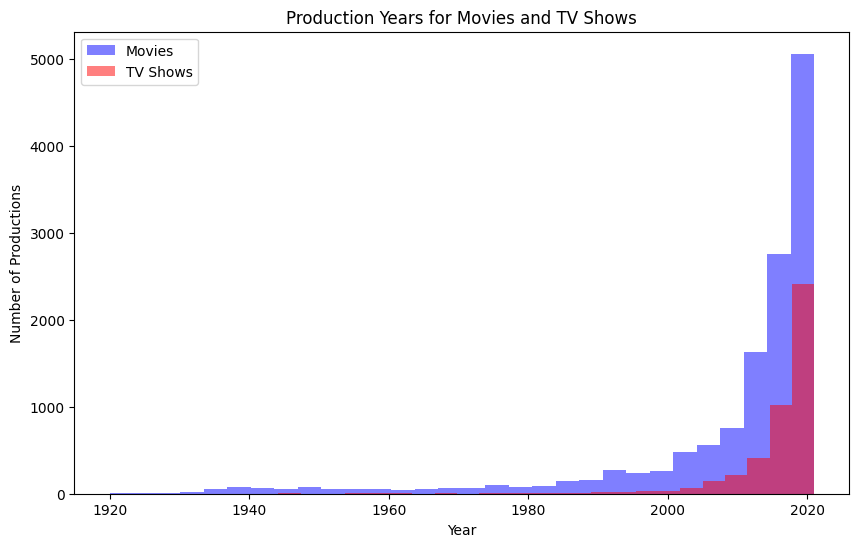

In [123]:
# Visualizing the distribution of production years for movies and TV shows

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for movies (blue) and TV shows (red)
ax.hist(combinedData[combinedData['type'] == 'Movie']['release_year'], bins=30, alpha=0.5, label='Movies', color='blue')
ax.hist(combinedData[combinedData['type'] == 'TV Show']['release_year'], bins=30, alpha=0.5, label='TV Shows', color='red')

# Set labels and title for the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Productions')
ax.set_title('Production Years for Movies and TV Shows')
ax.legend()  # Show legend for movie and TV show categories

# Display the plot
plt.show()


***Answer to research question:*** 2020 is the most recent year in which movies and television series were released

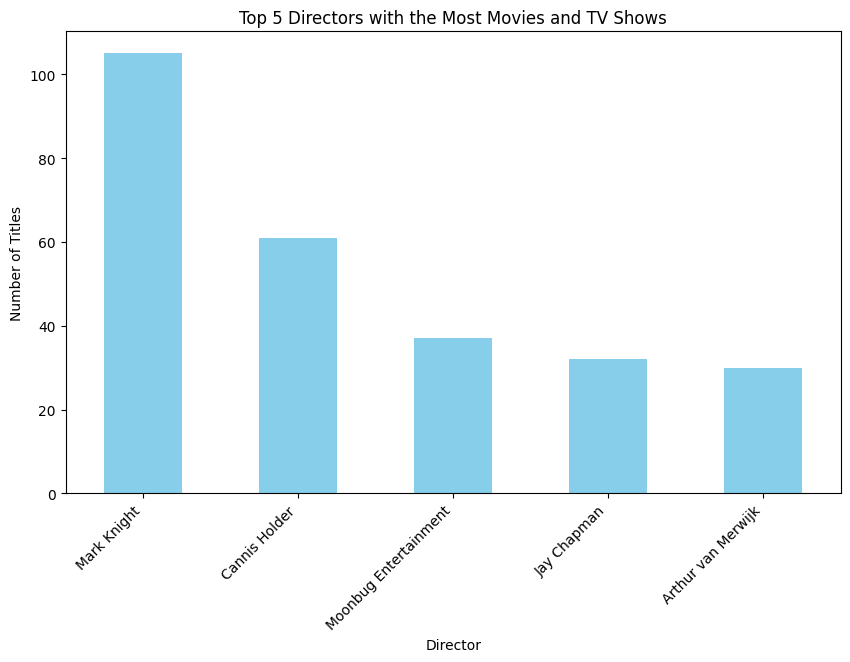

In [124]:
# Visualizing the top 5 directors with the most movies and TV shows

# Group the data by director and count the number of movies and TV shows for each director
director_counts = combinedData.groupby('director')['title'].count().sort_values(ascending=False)

# Select the top 5 directors with the highest counts of movies and TV shows
top_directors = director_counts.head(5)

# Create a bar plot to display the top directors
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='skyblue')

# Set labels and title for the plot
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.title('Top 5 Directors with the Most Movies and TV Shows')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Display the plot
plt.show()


**Response to study question**: 'Mark Knight' is the most prolific director.

### **5.2:** Reflection
What steps would you take if you had extra time to complete the job? For example, whatever data quality and structural concerns would you investigate more, and what research questions would you pursue?

***Answer:*** If given more time on this project, I would prioritize optimizing memory usage by correcting data types and handling the 'description' column for cleaning. This would involve ensuring all data is efficiently stored and processed.

Regarding research questions, I would explore popular categories among movies and TV shows, as well as the most common ratings within these categories. This analysis could provide insights into viewer preferences and trends in content consumption.